# Cálculo de Filtro Hodrick-Prescott


In [1]:
# Dependencias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de archivos:

PIB_df = pd.read_csv("PIB_TRIM.csv")
IGAE_df = pd.read_csv("IGAE_MEN.csv")

In [3]:
# 

PIB_df

,Periodo,PIB_MEX,GDP_USD
0,1993/01,10066121.86,6729.459
1,1993/02,10092487.93,6808.939
2,1993/03,10200852.22,6882.098
3,1993/04,10329632.31,7013.738
4,1994/01,10436716.63,7115.652
...,...,...,...
103,2018/04,18590228.01,20897.804
104,2019/01,18566766.49,21098.827
105,2019/02,18547684.05,21340.267
106,2019/03,18532013.87,21542.540


In [4]:
# 

IGAE_df

,Periodo,IGAE_MEX,IPI_USA
0,1993/01,61.665099,64.531306
1,1993/02,62.582519,64.817393
2,1993/03,62.341672,64.726652
3,1993/04,62.426948,64.953699
4,1993/05,63.035579,64.728203
...,...,...,...
319,2019/08,112.750030,106.499151
320,2019/09,112.958486,106.136283
321,2019/10,112.457406,105.679280
322,2019/11,112.601803,106.613838


## Filtro Hodrick-Prescott

### Hodrick-Prescott

Método tradicional de HP consiste en minimizar la serie $\{ \tau_t \}_{t=-1}^T$:

$$\sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=1}^{T} [(\tau_{t} - \tau_{t-1}) - (\tau_{t-1} - \tau_{t-2})]^2$$

Donde $\lambda$ es una parámetro fijo (determinado ex-ante) y $\tau_t$ es un componente de tendencia de $y_t$.

Sin pérdida de generalidad, asumiremos que $\tau_{-1}$ y $\tau_{0}$ son cero (0). De esta manera, la forma matricial del filtro HP es:
$$(Y - G)'(Y - G) + \lambda G' K' K G$$

La derivada de los anteriores:
$$-2 Y + 2 G + \lambda 2 K' K G = 0$$

Despejando:
$$G_{hp} = [I_T + \lambda K' K]^{-1} Y$$

Donde $G$ es el vector de tendencia, $Y$ es el vector de la serie de datos, $\lambda$ es la constante tradicional, y $K$ es de dimensión $T \times T$ y está dada por la expresión:
$$K = 
\begin{pmatrix}
1 & 0 & 0 & 0 & \ldots & 0 \\
-2 & 1 & 0 & 0 & \ldots & 0 \\
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

Así:

$$K' = 
\begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
0 & 0 & 1 & -2 & \ldots & 0 \\
0 & 0 & 0 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

In [5]:
# CASO: PIB Trimestral
# Definición de parámetros:
T = 108
Lambda = 1600
K = np.identity(T)

In [6]:
K

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
for i, j in itertools.product(range(T), range(T)):
    if i - 1 == j:
        K[i][j] = -2
    if i - 2 == j:
        K[i][j] = 1

In [8]:
K

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

In [9]:
np.transpose(K)

array([[ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [10]:
Y = np.array(PIB_df['PIB_MEX'])
Y

array([10066121.86, 10092487.93, 10200852.22, 10329632.31, 10436716.63,
       10655450.27, 10742186.42, 10861848.51, 10238043.32,  9736364.21,
        9926096.96, 10110488.97, 10367229.46, 10518854.09, 10703541.26,
       11018639.93, 11037680.74, 11293348.09, 11512936.17, 11790790.53,
       11903392.13, 11990433.81, 12045238.13, 12063955.33, 12195322.24,
       12265454.45, 12364920.6 , 12493022.47, 12722924.59, 12927620.25,
       13028513.1 , 12942040.77, 12957763.08, 12879137.31, 12882651.4 ,
       12821843.85, 12742924.66, 12853100.83, 12940661.04, 12980917.97,
       13015289.95, 13041188.38, 13040282.67, 13176382.76, 13343988.17,
       13570141.95, 13551818.37, 13718241.91, 13741612.99, 13782648.62,
       13909178.65, 14129444.56, 14378259.9 , 14520155.2 , 14564962.75,
       14596400.26, 14699980.57, 14812820.95, 14905521.63, 14965263.14,
       14915886.46, 15048665.69, 15092670.04, 14852544.92, 14096777.9 ,
       13881028.27, 14331726.67, 14580211.04, 14738249.1 , 14890

In [11]:
I_T = np.identity(T)
I_T

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
np.matmul( np.transpose(K), K) 

array([[ 6., -4.,  1., ...,  0.,  0.,  0.],
       [-4.,  6., -4., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ..., -4.,  5., -2.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

In [13]:
G_HP = np.matmul( np.linalg.inv( I_T + Lambda * np.matmul( np.transpose(K), K) ), Y)
G_HP

array([  233665.36423566,   650303.83769817,  1205368.45068861,
        1860213.59856572,  2581815.85404407,  3342445.17653286,
        4119280.83842629,  4894072.74030196,  5652710.09872595,
        6384811.99012042,  7082863.32417082,  7741443.73070005,
        8356909.86055336,  8927099.01785061,  9451104.95646129,
        9929016.27717498, 10361704.35347099, 10750721.57361162,
       11098042.81110079, 11405982.08101513, 11677112.70678061,
       11914248.51710379, 12120344.76533076, 12298404.32061566,
       12451383.11046555, 12582090.53176835, 12693175.94336794,
       12787090.80655711, 12866081.42303902, 12932210.3018065 ,
       12987450.47883173, 13033772.12130448, 13073171.0605528 ,
       13107585.79581013, 13138882.6963221 , 13168785.35103069,
       13198857.20431768, 13230444.86212671, 13264609.97256123,
       13302178.3437046 , 13343773.31555732, 13389817.44038633,
       13440527.9683551 , 13495904.25646432, 13555695.50840326,
       13619451.22692586, 13686588.59769

In [14]:
Ciclo = Y - G_HP
Ciclo

array([ 9.83245650e+06,  9.44218409e+06,  8.99548377e+06,  8.46941871e+06,
        7.85490078e+06,  7.31300509e+06,  6.62290558e+06,  5.96777577e+06,
        4.58533322e+06,  3.35155222e+06,  2.84323364e+06,  2.36904524e+06,
        2.01031960e+06,  1.59175507e+06,  1.25243630e+06,  1.08962365e+06,
        6.75976387e+05,  5.42626516e+05,  4.14893359e+05,  3.84808449e+05,
        2.26279423e+05,  7.61852929e+04, -7.51066353e+04, -2.34448991e+05,
       -2.56060870e+05, -3.16636082e+05, -3.28255343e+05, -2.94068337e+05,
       -1.43156833e+05, -4.59005181e+03,  4.10626212e+04, -9.17313513e+04,
       -1.15407981e+05, -2.28448486e+05, -2.56231296e+05, -3.46941501e+05,
       -4.55932544e+05, -3.77344032e+05, -3.23948933e+05, -3.21260374e+05,
       -3.28483366e+05, -3.48629060e+05, -4.00245298e+05, -3.19521496e+05,
       -2.11707338e+05, -4.93092769e+04, -1.34770228e+05, -3.82520781e+04,
       -8.68565441e+04, -1.19144844e+05, -6.65110712e+04,  8.01367770e+04,
        2.56504342e+05,  

In [15]:
Filtro_DF = pd.DataFrame( {'Periodo': PIB_df['Periodo'], 
                           'PIB_MEX': PIB_df['PIB_MEX'], 
                           'Tendencia': G_HP, 
                           'Ciclo': Ciclo} )
Filtro_DF

,Periodo,PIB_MEX,Tendencia,Ciclo
0,1993/01,10066121.86,2.336654e+05,9.832456e+06
1,1993/02,10092487.93,6.503038e+05,9.442184e+06
2,1993/03,10200852.22,1.205368e+06,8.995484e+06
3,1993/04,10329632.31,1.860214e+06,8.469419e+06
4,1994/01,10436716.63,2.581816e+06,7.854901e+06
...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,4.458205e+04
104,2019/01,18566766.49,1.862334e+07,-5.657608e+04
105,2019/02,18547684.05,1.869999e+07,-1.523076e+05
106,2019/03,18532013.87,1.877606e+07,-2.440428e+05


In [16]:
# Seleccionamos los datos más ajustados:

Filtro_DF_2 = Filtro_DF[25: ]
Filtro_DF_2

,Periodo,PIB_MEX,Tendencia,Ciclo
25,1999/02,12265454.45,1.258209e+07,-316636.081768
26,1999/03,12364920.60,1.269318e+07,-328255.343368
27,1999/04,12493022.47,1.278709e+07,-294068.336557
28,2000/01,12722924.59,1.286608e+07,-143156.833039
29,2000/02,12927620.25,1.293221e+07,-4590.051807
...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,44582.045071
104,2019/01,18566766.49,1.862334e+07,-56576.083281
105,2019/02,18547684.05,1.869999e+07,-152307.610781
106,2019/03,18532013.87,1.877606e+07,-244042.834809


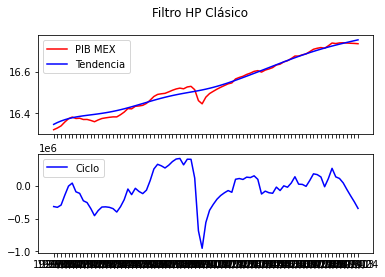

In [17]:
# Grafica:
Time = Filtro_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico')
axs[0].plot(Time, np.log(Filtro_DF_2['PIB_MEX']), label = 'PIB MEX', color = 'red', linestyle = '-')
axs[0].plot(Time, np.log(Filtro_DF_2['Tendencia']), label = 'Tendencia', color = 'blue', linestyle = '-')
axs[0].legend()
axs[1].plot(Time, Filtro_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].legend()

# Save the Figure
plt.savefig("HP_PIB_MX.png")

# Show the Figure
plt.show()

In [18]:
# Calculo del F(Lamda):
F_Lambda = np.matmul( np.matmul(np.transpose(G_HP), np.transpose(K)), np.matmul(K, G_HP) ) / np.matmul( np.transpose(Y - G_HP), (Y - G_HP) )
F_Lambda

0.0002517616835493242

In [19]:
Filtro_DF.to_csv('Filtro_HP_Mexico.csv', index = False)

In [20]:
# Determinar un Lambda Óptima:
Lambda_ss = 1096#1419

G_HP_ss = np.matmul( np.linalg.inv( I_T + Lambda_ss*np.matmul( np.transpose(K), K) ), Y)

F_Lambda_ss = np.matmul( np.matmul(np.transpose(G_HP_ss), np.transpose(K)), np.matmul(K, G_HP_ss) ) / np.matmul( np.transpose(Y - G_HP_ss), (Y - G_HP_ss) )
F_Lambda_ss

0.0003630003156022131

### Hodrick-Prescott por el Método de Ajuste de Colas (St-Amant & van Norden)

### Hodrick-Prescott planteado por St-Amant & van Norden

Método modificado de HP consiste en minimizar los valores de la serie $\{ \tau_t \}_{t=1}^T$:
$$\sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} [(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})]^2 + \lambda_{ss} \sum_{t=T-j}^{T} [\Delta \tau_t - u_{ss}]$$

Donde $\lambda$ es una parámetro fijo (determinado ex-ante), $\tau_t$ es un componente de tendencia de $y_t$, y los nuevos parámetros son $u_{ss}$ y $\lambda_{ss}$ ajustadas por el procedimiento de Marcet y Ravn (2004).

Este procedimiento asume que parte del filtro HP y que esta versión tiene el problema de pérdida de información al final y al principio de la muestra. La razón es que es un procedimeinto univariado que requiere de mucha información futura y pasada para mejorar el ajuste.

El compoenente adicional al filtro HP es un componente de castigo por desviaciones de la tasa de crecimiento de largo plazo, $u_{ss}$.

El proceso de selección de $\lambda_{ss}$ es e propuesto por Marcet y Ravn (2004), el cual consiste en utilizar un $\lambda$ convencional y el filtro HP convencional para estimar la siguiente función:
$$F(\lambda) = \frac{\sum_{t=2}^{T-1} ((\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}))^2}{\sum_{t=1}^T (y_t - \tau_t)^2}$$

Entonces el valor de $\lambda_{ss}$ será aquel que:
$$F(\lambda_{ss}) = \frac{\sum_{t=2}^{T-1} ((\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}))^2}{\sum_{t=1}^T (y_t - \tau_t)^2} = F(\lambda)$$

nota: Antón (2009) estimó $\lambda_{ss} = 1096$ para datos trimestrales del PIB.

La forma matricial del filtro HP-SAVN es:
$$(Y - G)'(Y - G) + \lambda G' K' K G + \lambda_{ss} (L^j G + \overline{u}_{ss} M^j)$$

Donde $L^j = (0, 0, \ldots, 0, -1, 0, \ldots, 0, 1)$, en el cual el valor $-1$ es en la posición $T-j-1$-ésima, y $M^j$ es un vector que toma valores de cero hasta antes de $T-j$ y de 1 después. 

La derivada de los anteriores:
$$-2 Y + 2 G + \lambda 2 K' K G + \lambda_{ss} L'^j = 0$$

Despejando:
$$G_{SAVN} = \frac{1}{2} [I_T + \lambda K' K]^{-1} (2 Y - \lambda_{ss} L'^j)$$

$$G_{SAVN} = [I_T + \lambda K' K]^{-1} Y - \frac{1}{2} [I_T + \lambda K' K]^{-1} \lambda_{ss} L'^j$$

Donde $G$ es el vector de tendencia, $Y$ es el vector de la serie de datos, $\lambda$ es la constante tradicional, y $K$ es de dimensión $T \times T$ y está dada por la expresión:

$$K' = 
\begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

Dicho lo anterior, podemos modificar $F(\lambda)$ para el filtro HP convencional como en forma matricial:
$$F(\lambda) = \frac{G' K' K G}{(Y - G)'(Y - G)}$$

In [21]:
# Definición de variables adicionales:
Lambda = 1600

j = 4
L_j = np.zeros(T)
L_j[T-1] = 1
L_j[T-j-1] = -1
L_j

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  1.])

In [22]:
# Filtro Ajustado a colas

G_HP_SAVN = (1/2) * np.matmul( np.linalg.inv( I_T + Lambda * np.matmul( np.transpose(K), K) ), ( 2 * Y - Lambda_ss*L_j ) ) 

G_HP_SAVN

array([  233665.36421196,   650303.83763119,  1205368.45056288,
        1860213.59836995,  2581815.85377121,  3342445.17618025,
        4119280.83799579,  4894072.73980018,  5652710.09816456,
        6384811.98951641,  7082863.32354689,  7741443.73008495,
        8356909.85998232,  8927099.0173657 ,  9451104.95611179,
        9929016.27701766, 10361704.35357035, 10750721.57404   ,
       11098042.81193826, 11405982.08234927, 11677112.70870597,
       11914248.51972105, 12120344.76874554, 12298404.32493688,
       12451383.11580327, 12582090.5382311 , 12693175.9510594 ,
       12787090.81557201, 12866081.43345839, 12932210.31369201,
       12987450.49221917, 13033772.13619637, 13073171.07690998,
       13107585.81354247, 13138882.71527829, 13168785.37098711,
       13198857.22496663, 13230444.88306386, 13264609.99327276,
       13302178.36355409, 13343773.33377283, 13389817.45604799,
       13440527.98038368, 13495904.26361153, 13555695.50924414,
       13619451.21985437, 13686588.58092

In [23]:
Ciclo_SAVN = Y - G_HP_SAVN
Ciclo_SAVN

array([ 9.83245650e+06,  9.44218409e+06,  8.99548377e+06,  8.46941871e+06,
        7.85490078e+06,  7.31300509e+06,  6.62290558e+06,  5.96777577e+06,
        4.58533322e+06,  3.35155222e+06,  2.84323364e+06,  2.36904524e+06,
        2.01031960e+06,  1.59175507e+06,  1.25243630e+06,  1.08962365e+06,
        6.75976386e+05,  5.42626516e+05,  4.14893358e+05,  3.84808448e+05,
        2.26279421e+05,  7.61852903e+04, -7.51066387e+04, -2.34448995e+05,
       -2.56060876e+05, -3.16636088e+05, -3.28255351e+05, -2.94068346e+05,
       -1.43156843e+05, -4.59006369e+03,  4.10626078e+04, -9.17313662e+04,
       -1.15407997e+05, -2.28448504e+05, -2.56231315e+05, -3.46941521e+05,
       -4.55932565e+05, -3.77344053e+05, -3.23948953e+05, -3.21260394e+05,
       -3.28483384e+05, -3.48629076e+05, -4.00245310e+05, -3.19521504e+05,
       -2.11707339e+05, -4.93092699e+04, -1.34770211e+05, -3.82520497e+04,
       -8.68565019e+04, -1.19144786e+05, -6.65109944e+04,  8.01368747e+04,
        2.56504464e+05,  

In [24]:
Filtro_SAVN_DF = pd.DataFrame( {'Periodo': PIB_df['Periodo'], 
                                'PIB_MEX': PIB_df['PIB_MEX'], 
                                'Tendencia': G_HP, 
                                'Ciclo': Ciclo,
                                'Tendencia_SAVN': G_HP_SAVN, 
                                'Ciclo_SAVN' :Ciclo_SAVN})

Filtro_SAVN_DF

,Periodo,PIB_MEX,Tendencia,Ciclo,Tendencia_SAVN,Ciclo_SAVN
0,1993/01,10066121.86,2.336654e+05,9.832456e+06,2.336654e+05,9.832456e+06
1,1993/02,10092487.93,6.503038e+05,9.442184e+06,6.503038e+05,9.442184e+06
2,1993/03,10200852.22,1.205368e+06,8.995484e+06,1.205368e+06,8.995484e+06
3,1993/04,10329632.31,1.860214e+06,8.469419e+06,1.860214e+06,8.469419e+06
4,1994/01,10436716.63,2.581816e+06,7.854901e+06,2.581816e+06,7.854901e+06
...,...,...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,4.458205e+04,1.854563e+07,4.459574e+04
104,2019/01,18566766.49,1.862334e+07,-5.657608e+04,1.862332e+07,-5.655521e+04
105,2019/02,18547684.05,1.869999e+07,-1.523076e+05,1.869996e+07,-1.522787e+05
106,2019/03,18532013.87,1.877606e+07,-2.440428e+05,1.877602e+07,-2.440052e+05


In [25]:
# Seleccionamos los datos más ajustados:

Filtro_SAVN_DF_2 = Filtro_SAVN_DF[25: ]
Filtro_SAVN_DF_2

,Periodo,PIB_MEX,Tendencia,Ciclo,Tendencia_SAVN,Ciclo_SAVN
25,1999/02,12265454.45,1.258209e+07,-316636.081768,1.258209e+07,-316636.088231
26,1999/03,12364920.60,1.269318e+07,-328255.343368,1.269318e+07,-328255.351059
27,1999/04,12493022.47,1.278709e+07,-294068.336557,1.278709e+07,-294068.345572
28,2000/01,12722924.59,1.286608e+07,-143156.833039,1.286608e+07,-143156.843458
29,2000/02,12927620.25,1.293221e+07,-4590.051807,1.293221e+07,-4590.063692
...,...,...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,44582.045071,1.854563e+07,44595.736956
104,2019/01,18566766.49,1.862334e+07,-56576.083281,1.862332e+07,-56555.211441
105,2019/02,18547684.05,1.869999e+07,-152307.610781,1.869996e+07,-152278.683844
106,2019/03,18532013.87,1.877606e+07,-244042.834809,1.877602e+07,-244005.249461


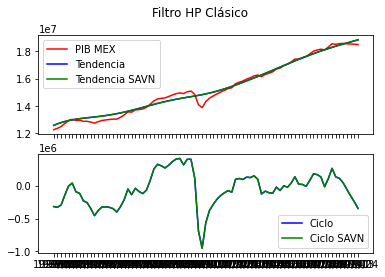

In [26]:
# Gráfica:
Time = Filtro_SAVN_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico')
axs[0].plot(Time, Filtro_SAVN_DF_2['PIB_MEX'], label = 'PIB MEX', color = 'red', linestyle = '-')
axs[0].plot(Time, Filtro_SAVN_DF_2['Tendencia'], label = 'Tendencia', color = 'blue', linestyle = '-')
axs[0].plot(Time, Filtro_SAVN_DF_2['Tendencia_SAVN'], label = 'Tendencia SAVN', color = 'green', linestyle = '-')
axs[0].legend()
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')
axs[1].legend()

# Save the Figure
plt.savefig("HP_PIB_MX_SAVN.png")

# Show the Figure
plt.show()

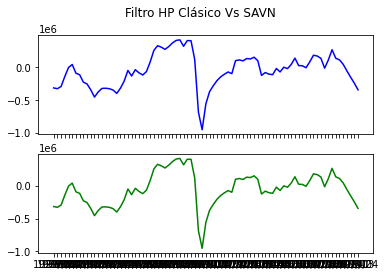

In [27]:
# Gráfica sólo Ciclo:
Time = Filtro_SAVN_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico Vs SAVN')

axs[0].plot(Time, Filtro_SAVN_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')


# Save the Figure
plt.savefig("CICLO_PIB_MX_SAVN.png")

# Show the Figure
plt.show()